## Sentiment Analysis with Tweepy

### Set up environment

In [1]:
#pip install 

In [2]:
import tweepy
import pandas as pd
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mathe\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mathe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mathe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mathe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mathe\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mathe\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       d

### Twitter Authentication

In [3]:
bearer = "AAAAAAAAAAAAAAAAAAAAAPeugQEAAAAAVi0ef3ZKfeQu84IONaURTQST6ss%3DlyN7hG9xj5kiNwDy4los2q09WKK1NqhhX1r1qcJ7ryOctfAyZ4"
consumer_key = "t3ahC4CLYCCZ3n3CDGBFPJMIY"
consumer_secret = "FPEILBDdq6TRyOCZ3o85SWm2M9LTwcce8DLI6R76WtPIN0VWjp" 
access_token = "1563137562654699521-Xpo0ndri5XEy4ero9XC6Ucmx6u9hVj"
access_token_secret = "Jbm8xURM17OYshFhHRbmm2ViuYgCaif52y8cJG8UNkODq"

In [4]:
## initialize tweepy
api = tweepy.Client(bearer, consumer_key, consumer_secret, access_token, access_token_secret)
api.get_me()

Response(data=<User id=1563137562654699521 name=Mrigendra kumar username=bablu_ai23>, includes={}, errors=[], meta={})

In [5]:
#Put your Bearer Token in the parenthesis below
client = tweepy.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAAPeugQEAAAAAVi0ef3ZKfeQu84IONaURTQST6ss%3DlyN7hG9xj5kiNwDy4los2q09WKK1NqhhX1r1qcJ7ryOctfAyZ4')

### Get recent public tweets on a keyword

In [6]:
# Pull tweets from twitter

query = '#PonniyinSelvan1 -is:retweet lang:en'
paginator = tweepy.Paginator(              # Calling Pagination a fuction in tweepy to arrange tweets in pages
    client.search_recent_tweets,           # The method you want to use to extract recent tweets 
    query=query,                           # aAgument for getting recent tweets
    max_results=100,                       # Number of tweets per page is defined
    limit=10                               # Number of pages to retrieve is defined
)
# Get tweets that contain the hashtag #TypeKeywordHere
# -is:retweet means I don't want retweets
# lang:en is asking for the tweets to be in english

tweet_list = []

for tweet in paginator.flatten(): # Total number of tweets to retrieve
    tweet_list.append(tweet)
    print(tweet)

#PonniyinSelvan1 it’s showtime…
Follow me I will Follow back u #PonniyinSelvan1
Thanks to the entire #PonniyinSelvan1 team for making this happen !! May this be this historic success of India cinema 🙏

.@MadrasTalkies_
.@arrahman
.@chiyaan
.@actor_jayamravi
.@Karthi_Offl
 #AishwaryaRai @trishtrashers
 #Karthi, #PS1review #TejRan https://t.co/IVpP0yRZeC
Just 11 minutes later for #PonniyinSelvan1 to watching I'm in https://t.co/CsRDuiCfMg
Superstar Rajinikanth about #PonniyinSelvan 👍🔁

#PonniyinSelvan1 #PS1 #PonniyinSelvanFDFS #PonniyinSelvanReview #ManiRatnam https://t.co/49gnbTGvjC
#PonniyinSelvan1 day. Eagerly waiting to watch the movie on screen Tonight.
Currently trending in #Jaipur: 1. #PonniyinSelvan1 (85260),2. #Adipurush (190590),3. #BeKindToAnimals (61905),4. #Prabhas (314664) https://t.co/e5OGEUfA86
Currently trending in #Jaipur: 1. #PonniyinSelvan1 (85260),2. #Adipurush (190590),3. #BeKindToAnimals (61813),4. #Prabhas (314664) https://t.co/w9HcCLv4FK
#PonniyinSelvan: ⭐⭐⭐⭐

On

In [7]:
#Creating new dataframe and new features
tweet_list_df = pd.DataFrame(tweet_list)
tweet_list_df = pd.DataFrame(tweet_list_df['text'])
tweet_list_df.head(5)

,text
0,#PonniyinSelvan1 it’s showtime…
1,Follow me I will Follow back u #PonniyinSelvan1
2,Thanks to the entire #PonniyinSelvan1 team for...
3,Just 11 minutes later for #PonniyinSelvan1 to ...
4,Superstar Rajinikanth about #PonniyinSelvan 👍🔁...


In [8]:
tweet_list_df.shape

(1000, 1)

### Data preprocessing

In [9]:
def preprocess_tweet(sen):
    '''Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only
    in lowercase'''
    
    sentence = sen.lower()

    # Remove RT
    sentence = re.sub('RT @\w+: '," ", sentence)
    # Tags are removed here

    # Remove special characters
    sentence = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", sentence)
    # All kind of special chaecters are removed in this stage

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  
    # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. 
    # Hence, we are left with single character "s" that we are removing here.

    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)  
    # Next, we remove all the single characters and replace it by a space which creates multiple
    # spaces in our text. Finally, we remove the multiple spaces from our text as well.

    return sentence

In [10]:
cleaned_tweets = []

for tweet in tweet_list_df['text']:
  cleaned_tweet = preprocess_tweet(tweet)
  cleaned_tweets.append(cleaned_tweet)

In [11]:
tweet_list_df['cleaned'] = pd.DataFrame(cleaned_tweets)
tweet_list_df.head(5)

,text,cleaned
0,#PonniyinSelvan1 it’s showtime…,ponniyinselvan1 it showtime
1,Follow me I will Follow back u #PonniyinSelvan1,follow me will follow back ponniyinselvan1
2,Thanks to the entire #PonniyinSelvan1 team for...,thanks to the entire ponniyinselvan1 team for ...
3,Just 11 minutes later for #PonniyinSelvan1 to ...,just 11 minutes later for ponniyinselvan1 to w...
4,Superstar Rajinikanth about #PonniyinSelvan 👍🔁...,superstar rajinikanth about ponniyinselvan pon...


In [15]:
############## TOKENIZING ##################
from nltk.tokenize import word_tokenize
tokenized_tweet = tweet_list_df['cleaned'].apply(word_tokenize)
tweet_list_df['tokenized'] = tokenized_tweet
tweet_list_df.head(5)

,text,cleaned,tokenized
0,#PonniyinSelvan1 it’s showtime…,ponniyinselvan1 it showtime,"[ponniyinselvan1, it, showtime]"
1,Follow me I will Follow back u #PonniyinSelvan1,follow me will follow back ponniyinselvan1,"[follow, me, will, follow, back, ponniyinselvan1]"
2,Thanks to the entire #PonniyinSelvan1 team for...,thanks to the entire ponniyinselvan1 team for ...,"[thanks, to, the, entire, ponniyinselvan1, tea..."
3,Just 11 minutes later for #PonniyinSelvan1 to ...,just 11 minutes later for ponniyinselvan1 to w...,"[just, 11, minutes, later, for, ponniyinselvan..."
4,Superstar Rajinikanth about #PonniyinSelvan 👍🔁...,superstar rajinikanth about ponniyinselvan pon...,"[superstar, rajinikanth, about, ponniyinselvan..."


In [16]:
############## STOPWORDS REMOVAL ##################
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
tweet_list_df['stopwords_removal'] = tweet_list_df['tokenized'].apply(lambda x: [word for word in x if word not in stop])
tweet_list_df.head()

,text,cleaned,tokenized,stopwords_removal
0,#PonniyinSelvan1 it’s showtime…,ponniyinselvan1 it showtime,"[ponniyinselvan1, it, showtime]","[ponniyinselvan1, showtime]"
1,Follow me I will Follow back u #PonniyinSelvan1,follow me will follow back ponniyinselvan1,"[follow, me, will, follow, back, ponniyinselvan1]","[follow, follow, back, ponniyinselvan1]"
2,Thanks to the entire #PonniyinSelvan1 team for...,thanks to the entire ponniyinselvan1 team for ...,"[thanks, to, the, entire, ponniyinselvan1, tea...","[thanks, entire, ponniyinselvan1, team, making..."
3,Just 11 minutes later for #PonniyinSelvan1 to ...,just 11 minutes later for ponniyinselvan1 to w...,"[just, 11, minutes, later, for, ponniyinselvan...","[11, minutes, later, ponniyinselvan1, watching]"
4,Superstar Rajinikanth about #PonniyinSelvan 👍🔁...,superstar rajinikanth about ponniyinselvan pon...,"[superstar, rajinikanth, about, ponniyinselvan...","[superstar, rajinikanth, ponniyinselvan, ponni..."


In [17]:
############## STEMMING ##################
from nltk.stem import PorterStemmer
def porter_stemmer(text):
    """
        Stem words in list of tokenized words with PorterStemmer
    """
    stemmer = nltk.PorterStemmer()
    stems = [stemmer.stem(i) for i in text]
    return stems

tweet_list_df['stemming'] = tweet_list_df['stopwords_removal'].apply(lambda x: porter_stemmer(x))
tweet_list_df.head()

,text,cleaned,tokenized,stopwords_removal,stemming
0,#PonniyinSelvan1 it’s showtime…,ponniyinselvan1 it showtime,"[ponniyinselvan1, it, showtime]","[ponniyinselvan1, showtime]","[ponniyinselvan1, showtim]"
1,Follow me I will Follow back u #PonniyinSelvan1,follow me will follow back ponniyinselvan1,"[follow, me, will, follow, back, ponniyinselvan1]","[follow, follow, back, ponniyinselvan1]","[follow, follow, back, ponniyinselvan1]"
2,Thanks to the entire #PonniyinSelvan1 team for...,thanks to the entire ponniyinselvan1 team for ...,"[thanks, to, the, entire, ponniyinselvan1, tea...","[thanks, entire, ponniyinselvan1, team, making...","[thank, entir, ponniyinselvan1, team, make, ha..."
3,Just 11 minutes later for #PonniyinSelvan1 to ...,just 11 minutes later for ponniyinselvan1 to w...,"[just, 11, minutes, later, for, ponniyinselvan...","[11, minutes, later, ponniyinselvan1, watching]","[11, minut, later, ponniyinselvan1, watch]"
4,Superstar Rajinikanth about #PonniyinSelvan 👍🔁...,superstar rajinikanth about ponniyinselvan pon...,"[superstar, rajinikanth, about, ponniyinselvan...","[superstar, rajinikanth, ponniyinselvan, ponni...","[superstar, rajinikanth, ponniyinselvan, ponni..."


In [18]:
############## LEMATIZING ##################
from nltk.stem import WordNetLemmatizer

lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
tweet_list_df['lemmatized'] = tweet_list_df['stopwords_removal'].apply(lambda x: lemmatizer_on_text(x))
tweet_list_df.head()

,text,cleaned,tokenized,stopwords_removal,stemming,lemmatized
0,#PonniyinSelvan1 it’s showtime…,ponniyinselvan1 it showtime,"[ponniyinselvan1, it, showtime]","[ponniyinselvan1, showtime]","[ponniyinselvan1, showtim]","[ponniyinselvan1, showtime]"
1,Follow me I will Follow back u #PonniyinSelvan1,follow me will follow back ponniyinselvan1,"[follow, me, will, follow, back, ponniyinselvan1]","[follow, follow, back, ponniyinselvan1]","[follow, follow, back, ponniyinselvan1]","[follow, follow, back, ponniyinselvan1]"
2,Thanks to the entire #PonniyinSelvan1 team for...,thanks to the entire ponniyinselvan1 team for ...,"[thanks, to, the, entire, ponniyinselvan1, tea...","[thanks, entire, ponniyinselvan1, team, making...","[thank, entir, ponniyinselvan1, team, make, ha...","[thanks, entire, ponniyinselvan1, team, making..."
3,Just 11 minutes later for #PonniyinSelvan1 to ...,just 11 minutes later for ponniyinselvan1 to w...,"[just, 11, minutes, later, for, ponniyinselvan...","[11, minutes, later, ponniyinselvan1, watching]","[11, minut, later, ponniyinselvan1, watch]","[11, minutes, later, ponniyinselvan1, watching]"
4,Superstar Rajinikanth about #PonniyinSelvan 👍🔁...,superstar rajinikanth about ponniyinselvan pon...,"[superstar, rajinikanth, about, ponniyinselvan...","[superstar, rajinikanth, ponniyinselvan, ponni...","[superstar, rajinikanth, ponniyinselvan, ponni...","[superstar, rajinikanth, ponniyinselvan, ponni..."


In [19]:
############## TAGGING ##################
tweet_list_df['tagging'] = tweet_list_df['lemmatized'].apply(lambda x: nltk.pos_tag(x))
tweet_list_df.head()

,text,cleaned,tokenized,stopwords_removal,stemming,lemmatized,tagging
0,#PonniyinSelvan1 it’s showtime…,ponniyinselvan1 it showtime,"[ponniyinselvan1, it, showtime]","[ponniyinselvan1, showtime]","[ponniyinselvan1, showtim]","[ponniyinselvan1, showtime]","[(ponniyinselvan1, NN), (showtime, NN)]"
1,Follow me I will Follow back u #PonniyinSelvan1,follow me will follow back ponniyinselvan1,"[follow, me, will, follow, back, ponniyinselvan1]","[follow, follow, back, ponniyinselvan1]","[follow, follow, back, ponniyinselvan1]","[follow, follow, back, ponniyinselvan1]","[(follow, VB), (follow, VB), (back, RB), (ponn..."
2,Thanks to the entire #PonniyinSelvan1 team for...,thanks to the entire ponniyinselvan1 team for ...,"[thanks, to, the, entire, ponniyinselvan1, tea...","[thanks, entire, ponniyinselvan1, team, making...","[thank, entir, ponniyinselvan1, team, make, ha...","[thanks, entire, ponniyinselvan1, team, making...","[(thanks, NNS), (entire, JJ), (ponniyinselvan1..."
3,Just 11 minutes later for #PonniyinSelvan1 to ...,just 11 minutes later for ponniyinselvan1 to w...,"[just, 11, minutes, later, for, ponniyinselvan...","[11, minutes, later, ponniyinselvan1, watching]","[11, minut, later, ponniyinselvan1, watch]","[11, minutes, later, ponniyinselvan1, watching]","[(11, CD), (minutes, NNS), (later, RB), (ponni..."
4,Superstar Rajinikanth about #PonniyinSelvan 👍🔁...,superstar rajinikanth about ponniyinselvan pon...,"[superstar, rajinikanth, about, ponniyinselvan...","[superstar, rajinikanth, ponniyinselvan, ponni...","[superstar, rajinikanth, ponniyinselvan, ponni...","[superstar, rajinikanth, ponniyinselvan, ponni...","[(superstar, NN), (rajinikanth, NN), (ponniyin..."


### Generate Sentiment Labels

In [23]:
#Calculating the polarity and subjectivity of the tweet using Textblob Analyzer
tweet_list_df[['polarity', 'subjectivity']]=tweet_list_df['cleaned'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
def textblob_sentiment(sentiment):
    if sentiment <= -0.05:
        x = "negative"
    elif sentiment >= 0.05:
        x = "positive"
    else:
        x = "neutral"

    return x

tweet_list_df['textblob_sentiment'] = tweet_list_df['polarity'].apply(lambda x: textblob_sentiment(x))
tweet_list_df.head(5)

,text,cleaned,tokenized,stopwords_removal,stemming,lemmatized,tagging,polarity,subjectivity,textblob_sentiment
0,#PonniyinSelvan1 it’s showtime…,ponniyinselvan1 it showtime,"[ponniyinselvan1, it, showtime]","[ponniyinselvan1, showtime]","[ponniyinselvan1, showtim]","[ponniyinselvan1, showtime]","[(ponniyinselvan1, NN), (showtime, NN)]",0.000,0.00000,neutral
1,Follow me I will Follow back u #PonniyinSelvan1,follow me will follow back ponniyinselvan1,"[follow, me, will, follow, back, ponniyinselvan1]","[follow, follow, back, ponniyinselvan1]","[follow, follow, back, ponniyinselvan1]","[follow, follow, back, ponniyinselvan1]","[(follow, VB), (follow, VB), (back, RB), (ponn...",0.000,0.00000,neutral
2,Thanks to the entire #PonniyinSelvan1 team for...,thanks to the entire ponniyinselvan1 team for ...,"[thanks, to, the, entire, ponniyinselvan1, tea...","[thanks, entire, ponniyinselvan1, team, making...","[thank, entir, ponniyinselvan1, team, make, ha...","[thanks, entire, ponniyinselvan1, team, making...","[(thanks, NNS), (entire, JJ), (ponniyinselvan1...",0.125,0.20625,positive
3,Just 11 minutes later for #PonniyinSelvan1 to ...,just 11 minutes later for ponniyinselvan1 to w...,"[just, 11, minutes, later, for, ponniyinselvan...","[11, minutes, later, ponniyinselvan1, watching]","[11, minut, later, ponniyinselvan1, watch]","[11, minutes, later, ponniyinselvan1, watching]","[(11, CD), (minutes, NNS), (later, RB), (ponni...",0.000,0.00000,neutral
4,Superstar Rajinikanth about #PonniyinSelvan 👍🔁...,superstar rajinikanth about ponniyinselvan pon...,"[superstar, rajinikanth, about, ponniyinselvan...","[superstar, rajinikanth, ponniyinselvan, ponni...","[superstar, rajinikanth, ponniyinselvan, ponni...","[superstar, rajinikanth, ponniyinselvan, ponni...","[(superstar, NN), (rajinikanth, NN), (ponniyin...",0.000,0.00000,neutral


In [33]:
#Calculating Negative, Positive, Neutral and Compound values using NLTK VADER Sentiment Intensity Analyzer

for index, row in tweet_list_df['cleaned'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if comp <= -0.05:
        tweet_list_df.loc[index, 'vader_sentiment'] = "negative"
    elif comp >= 0.05:
        tweet_list_df.loc[index, 'vader_sentiment'] = "positive"
    else:
        tweet_list_df.loc[index, 'vader_sentiment'] = "neutral"
    tweet_list_df.loc[index, 'neg'] = neg
    tweet_list_df.loc[index, 'neu'] = neu
    tweet_list_df.loc[index, 'pos'] = pos
    tweet_list_df.loc[index, 'compound'] = comp

tweet_list_df.head(5)

,text,cleaned,tokenized,stopwords_removal,stemming,lemmatized,tagging,polarity,subjectivity,textblob_sentiment,vader_sentiment,neg,neu,pos,compound
0,#PonniyinSelvan1 it’s showtime…,ponniyinselvan1 it showtime,"[ponniyinselvan1, it, showtime]","[ponniyinselvan1, showtime]","[ponniyinselvan1, showtim]","[ponniyinselvan1, showtime]","[(ponniyinselvan1, NN), (showtime, NN)]",0.000,0.00000,neutral,neutral,0.0,1.000,0.000,0.000
1,Follow me I will Follow back u #PonniyinSelvan1,follow me will follow back ponniyinselvan1,"[follow, me, will, follow, back, ponniyinselvan1]","[follow, follow, back, ponniyinselvan1]","[follow, follow, back, ponniyinselvan1]","[follow, follow, back, ponniyinselvan1]","[(follow, VB), (follow, VB), (back, RB), (ponn...",0.000,0.00000,neutral,neutral,0.0,1.000,0.000,0.000
2,Thanks to the entire #PonniyinSelvan1 team for...,thanks to the entire ponniyinselvan1 team for ...,"[thanks, to, the, entire, ponniyinselvan1, tea...","[thanks, entire, ponniyinselvan1, team, making...","[thank, entir, ponniyinselvan1, team, make, ha...","[thanks, entire, ponniyinselvan1, team, making...","[(thanks, NNS), (entire, JJ), (ponniyinselvan1...",0.125,0.20625,positive,positive,0.0,0.777,0.223,0.765
3,Just 11 minutes later for #PonniyinSelvan1 to ...,just 11 minutes later for ponniyinselvan1 to w...,"[just, 11, minutes, later, for, ponniyinselvan...","[11, minutes, later, ponniyinselvan1, watching]","[11, minut, later, ponniyinselvan1, watch]","[11, minutes, later, ponniyinselvan1, watching]","[(11, CD), (minutes, NNS), (later, RB), (ponni...",0.000,0.00000,neutral,neutral,0.0,1.000,0.000,0.000
4,Superstar Rajinikanth about #PonniyinSelvan 👍🔁...,superstar rajinikanth about ponniyinselvan pon...,"[superstar, rajinikanth, about, ponniyinselvan...","[superstar, rajinikanth, ponniyinselvan, ponni...","[superstar, rajinikanth, ponniyinselvan, ponni...","[superstar, rajinikanth, ponniyinselvan, ponni...","[(superstar, NN), (rajinikanth, NN), (ponniyin...",0.000,0.00000,neutral,neutral,0.0,1.000,0.000,0.000


### Sentiment Visualisation

In [34]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tweet_list_df_negative = tweet_list_df[tweet_list_df["vader_sentiment"]=="negative"]
tweet_list_df_positive = tweet_list_df[tweet_list_df["vader_sentiment"]=="positive"]
tweet_list_df_neutral = tweet_list_df[tweet_list_df["vader_sentiment"]=="neutral"]

#### Donut Charts

In [35]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [38]:
#Count_values for textblob sentiment
count_values_in_column(tweet_list_df,"textblob_sentiment")

,Total,Percentage
positive,481,48.1
neutral,450,45.0
negative,69,6.9


In [39]:
#Count_values for vader sentiment
count_values_in_column(tweet_list_df,"vader_sentiment")

,Total,Percentage
positive,579,57.9
neutral,333,33.3
negative,88,8.8


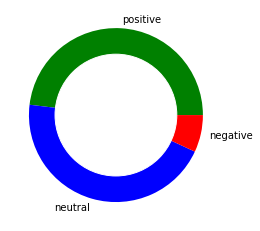

In [40]:
# create data for Pie Chart text blob
pichart = count_values_in_column(tweet_list_df,"textblob_sentiment")
# names= pc.index
# size=pc["Percentage"]

names= pichart.index
size=pichart["Percentage"]

# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

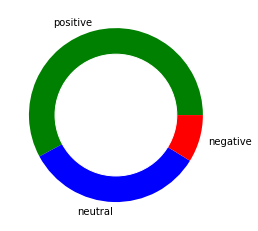

In [41]:
# create data for Pie Chart text blob
pichart = count_values_in_column(tweet_list_df,"vader_sentiment")
# names= pc.index
# size=pc["Percentage"]

names= pichart.index
size=pichart["Percentage"]

# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

#### Word Clouds

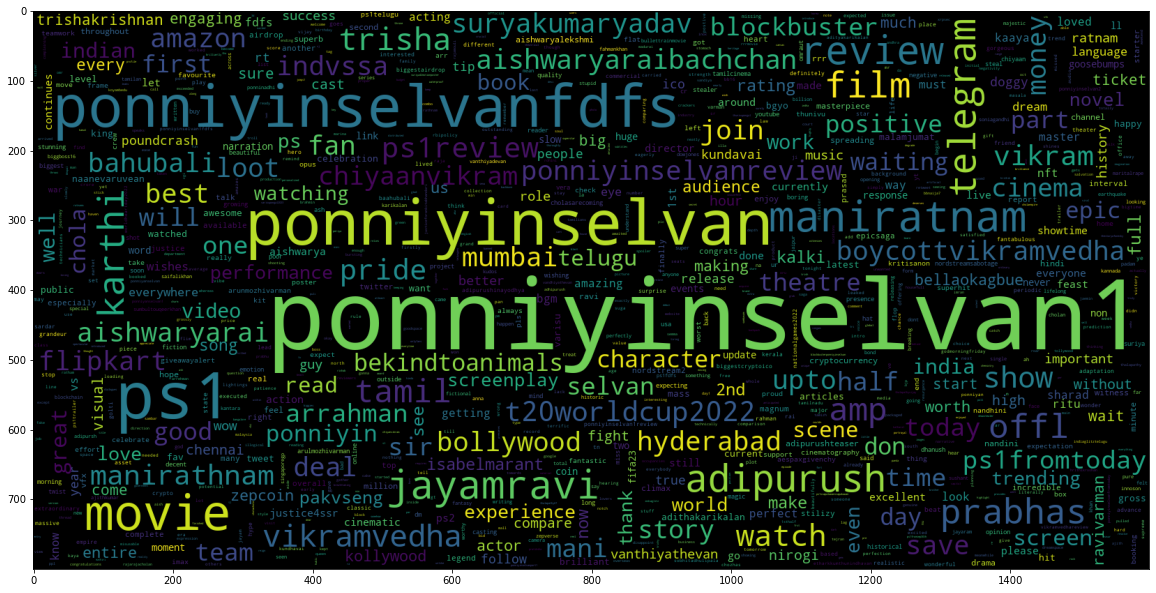

In [42]:
word_cloud = WordCloud(max_words = 1000 , width = 1600 , height = 800, collocations=False)
plt.figure(figsize = (20,20))
wc = word_cloud.generate(" ".join(tweet_list_df['cleaned']))
plt.imshow(wc)

#### Text Insights

In [43]:
#Calculating tweet's lenght and word count
tweet_list_df['text_len'] = tweet_list_df['cleaned'].astype(str).apply(len)
tweet_list_df['text_word_count'] = tweet_list_df['cleaned'].apply(lambda x: len(str(x).split()))

In [44]:
round(pd.DataFrame(tweet_list_df.groupby("textblob_sentiment").text_len.mean()),2)

,text_len
textblob_sentiment,
negative,172.97
neutral,115.60
positive,165.54


In [45]:
round(pd.DataFrame(tweet_list_df.groupby("textblob_sentiment").text_word_count.mean()),2)

,text_word_count
textblob_sentiment,
negative,23.64
neutral,14.17
positive,24.05


In [46]:
round(pd.DataFrame(tweet_list_df.groupby("vader_sentiment").text_len.mean()),2)

,text_len
vader_sentiment,
negative,163.17
neutral,105.97
positive,162.24


In [47]:
round(pd.DataFrame(tweet_list_df.groupby("vader_sentiment").text_word_count.mean()),2)

,text_word_count
vader_sentiment,
negative,23.80
neutral,12.38
positive,23.07


### Saving Output Tweets File to Drive

In [81]:
tweet_list_df.to_csv("c:/Users/mathe/Desktop/c2_sentimentanalysis_output1.csv", sep=',', encoding='UTF-8')

In [82]:
tweet_list_df.shape

(999, 16)